In [1]:
from numpy import linspace, zeros
from matplotlib.pyplot import subplots
from weichsel_schwarz import Network

In [2]:
num_front_filaments_row = linspace(2, 140, 20, dtype = int)
num_replicates = 10
order_parameter_mat = zeros((num_front_filaments_row.size, num_replicates))
rel_growth_rate_mat = zeros((num_front_filaments_row.size, num_replicates))
nucleation_rate_mat = zeros((num_front_filaments_row.size, num_replicates))
density_active_mat = zeros((num_front_filaments_row.size, num_replicates))

In [3]:
from joblib import Parallel, delayed
def compute_network_properties(x):
    network = Network(num_front_filaments=x)
    network.simulate()
    network.compute_order_parameter()
    rel_growth_rate = network.leading_edge_position / network.current_time / network.elongation_rate_const
    nucleation_rate = (network.barbed_position_mat.shape[0] - 150) / network.current_time
    density_active = network.active_filament_index.size
    return network.order_parameter, rel_growth_rate, nucleation_rate, density_active

In [4]:
for i in range(num_replicates):
    i_output = Parallel(n_jobs=-1)(delayed(compute_network_properties)(j) for j in num_front_filaments_row)
    for k in range(len(i_output)):
        order_parameter_mat[k, i] = i_output[k][0]
        rel_growth_rate_mat[k, i] = i_output[k][1]
        nucleation_rate_mat[k, i] = i_output[k][2]
        density_active_mat[k, i] = i_output[k][3]

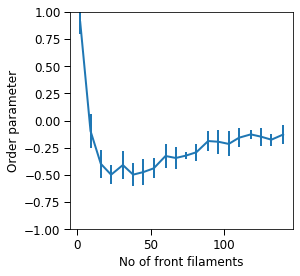

In [5]:
fig1_hand, axes1_hand = subplots()
fig1_hand.set_figheight(4)
fig1_hand.set_figwidth(4)
axes1_hand.errorbar(num_front_filaments_row, order_parameter_mat.mean(axis=1), order_parameter_mat.std(axis=1), linewidth=2)
axes1_hand.set_ylim(-1, 1)
axes1_hand.set_xlabel('No of front filaments', fontsize=12)
axes1_hand.set_ylabel('Order parameter', fontsize=12)
axes1_hand.tick_params(labelsize=12, length=6, width=1)

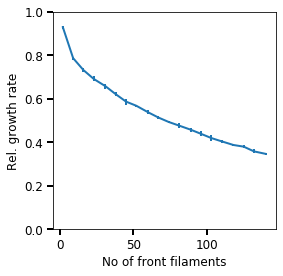

In [6]:
fig2_hand, axes2_hand = subplots()
fig2_hand.set_figheight(4)
fig2_hand.set_figwidth(4)
axes2_hand.errorbar(num_front_filaments_row, rel_growth_rate_mat.mean(axis=1), rel_growth_rate_mat.std(axis=1), linewidth=2)
axes2_hand.set_ylim(0, 1)
axes2_hand.set_xlabel('No of front filaments', fontsize=12)
axes2_hand.set_ylabel('Rel. growth rate', fontsize=12)
axes2_hand.tick_params(labelsize=12, length=6, width=2)

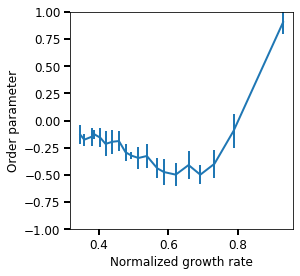

In [7]:
fig3_hand, axes3_hand = subplots()
fig3_hand.set_figheight(4)
fig3_hand.set_figwidth(4)
axes3_hand.errorbar(rel_growth_rate_mat.mean(axis=1), order_parameter_mat.mean(axis=1), order_parameter_mat.std(axis=1), linewidth=2)
axes3_hand.set_ylim(-1, 1)
axes3_hand.set_xlabel('Normalized growth rate', fontsize=12)
axes3_hand.set_ylabel('Order parameter', fontsize=12)
axes3_hand.tick_params(labelsize=12, length=6, width=2)

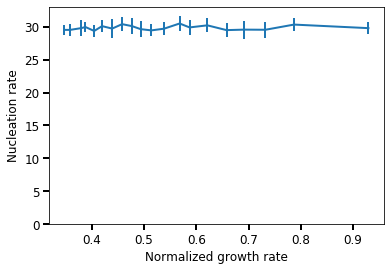

In [8]:
fig4_hand, axes4_hand = subplots()
fig3_hand.set_figheight(4)
fig3_hand.set_figwidth(4)
axes4_hand.errorbar(rel_growth_rate_mat.mean(axis=1), nucleation_rate_mat.mean(axis=1), nucleation_rate_mat.std(axis=1), linewidth=2)
axes4_hand.set_ylim(0, 33)
axes4_hand.set_xlabel('Normalized growth rate', fontsize=12)
axes4_hand.set_ylabel('Nucleation rate', fontsize=12)
axes4_hand.tick_params(labelsize=12, length=6, width=2)

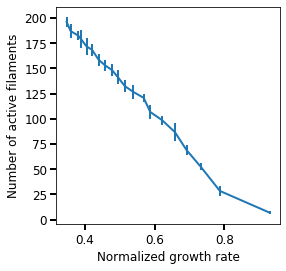

In [9]:
fig4_hand, axes4_hand = subplots()
fig4_hand.set_figheight(4)
fig4_hand.set_figwidth(4)
axes4_hand.errorbar(rel_growth_rate_mat.mean(axis=1), density_active_mat.mean(axis=1), density_active_mat.std(axis=1), linewidth=2)
axes4_hand.set_xlabel('Normalized growth rate', fontsize=12)
axes4_hand.set_ylabel('Number of active filaments', fontsize=12)
axes4_hand.tick_params(labelsize=12, length=6, width=2)